# Regularity conditions for tensor components in polar coordinates

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import plottings
from IPython.display import display

Utilities for symbolic manipulation

In [3]:
s = sp.Symbol("s")
p = sp.Symbol(r"\phi")
x = sp.Symbol("x")
y = sp.Symbol("y")

A = sp.Symbol("A")
A_x = sp.Symbol("A_x")
A_y = sp.Symbol("A_y")
A_s = sp.Symbol("A_s")
A_p = sp.Symbol(r"A_{\phi}")
A_xx = sp.Symbol("A_{xx}")
A_xy = sp.Symbol("A_{xy}")
A_yx = sp.Symbol("A_{yx}")
A_yy = sp.Symbol("A_{yy}")
A_ss = sp.Symbol("A_{ss}")
A_sp = sp.Symbol(r"A_{s\phi}")
A_ps = sp.Symbol(r"A_{\phi s}")
A_pp = sp.Symbol(r"A_{\phi\phi}")


cart2polar_map = {
    x: s*sp.cos(p),
    y: s*sp.sin(p)
}

polar2cart_map = {
    s: sp.sqrt(x**2 + y**2),
    sp.exp(+sp.I*p): (x + sp.I*y)/sp.sqrt(x**2 + y**2),
    sp.exp(-sp.I*p): (x - sp.I*y)/sp.sqrt(x**2 + y**2)
}

---
## Scalar

The regularity condition for scalar (Lewis and Bellan [1990](https://doi.org/10.1063/1.529009)):
$$
A = \sum_{m=-\infty}^{+\infty} s^{|m|} p(s^2) e^{im\phi}
$$

### Example: a singular scalar field showing necessity of the conditions

The following field (containing only $|m|=1$)

In [4]:
A_val = sp.cos(p)
display(sp.Eq(A, A_val))
display(sp.Eq(A, A_val.rewrite(sp.exp)))

Eq(A, cos(\phi))

Eq(A, exp(I*\phi)/2 + exp(-I*\phi)/2)

does not have the leading order behaviour $s^1$ required.

As we convert it to Cartesian coordinates, it takes the following form in Cartesian coordinates

In [5]:
sp.Eq(A, A_val.rewrite(sp.exp).subs(polar2cart_map).simplify())

Eq(A, x/sqrt(x**2 + y**2))

The field is thus singular, even discontinous at the origin.

The visualization of the field is as follows

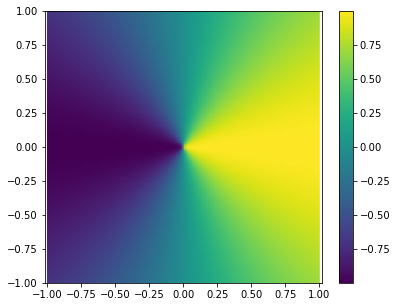

In [6]:
A_numerical = sp.lambdify((s, p), A_val)
fig, ax = plottings.polar_singularity_scalar(sfunc=A_numerical)
plt.show()

### Example: confirmation of the conditions

Now we simplify modify the field by adding a $s^1$ prefactor

In [7]:
A_val = s*sp.cos(p)
display(sp.Eq(A, A_val))
display(sp.Eq(A, A_val.rewrite(sp.exp).expand()))

Eq(A, s*cos(\phi))

Eq(A, s*exp(I*\phi)/2 + s*exp(-I*\phi)/2)

As we convert it to Cartesian coordinates, it takes the following form in Cartesian coordinates

In [8]:
sp.Eq(A, A_val.rewrite(sp.exp).subs(polar2cart_map).simplify())

Eq(A, x)

The field is thus regular:

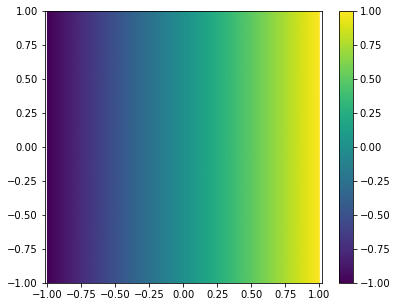

In [9]:
A_numerical = sp.lambdify((s, p), A_val)
fig, ax = plottings.polar_singularity_scalar(sfunc=A_numerical)
plt.show()

---
## Vector

The regularity condition for vector (Lewis and Bellan [1990](https://doi.org/10.1063/1.529009)):
$$
\begin{aligned}
A_s &= sp(s^2) + \sum_{m\neq 0} \left(\lambda_m s^{|m|-1} + s^{|m|+1}p(s^2)\right) e^{im\phi},\\
A_\phi &= sp(s^2) + \sum_{m\neq 0} \left(i\mathrm{sgn}(m)\lambda_m s^{|m|-1} + s^{|m|+1}p(s^2)\right) e^{im\phi}
\end{aligned}
$$

In [10]:
def rotate_polar2cart_vec(F_s, F_p):
    return F_s*sp.cos(p) - F_p*sp.sin(p), F_s*sp.sin(p) + F_p*sp.cos(p)

### (Counter)Example: Lewis-Bellan relations are not necessary for one component to be regular

Consider the following vector field

In [11]:
A_s_val = (1 - sp.cos(2*p))/s
A_p_val = sp.sin(2*p)/s
A_s_exp = A_s_val.rewrite(sp.exp).expand()
A_p_exp = A_p_val.rewrite(sp.exp).expand()
display(sp.Eq(A_s, A_s_val))
display(sp.Eq(A_p, A_p_val))
display(sp.Eq(A_s, A_s_exp))
display(sp.Eq(A_p, A_p_exp))

Eq(A_s, (1 - cos(2*\phi))/s)

Eq(A_{\phi}, sin(2*\phi)/s)

Eq(A_s, -exp(2*I*\phi)/(2*s) + 1/s - exp(-2*I*\phi)/(2*s))

Eq(A_{\phi}, -I*exp(2*I*\phi)/(2*s) + I*exp(-2*I*\phi)/(2*s))

which does not fulfill the Lewis-Bellan relations at all (even the Fourier coefficients are singular!).

Nevertheless, as we convert it to Cartesian coordinates, it takes the following form in Cartesian coordinates

In [12]:
A_x_val, A_y_val = rotate_polar2cart_vec(A_s_exp, A_p_exp)
display(sp.Eq(A_x, A_x_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_y, A_y_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))

Eq(A_x, 0)

Eq(A_y, 2*y/(x**2 + y**2))

The field is of course singular, even blows up at the origin for $A_y$, but the $A_x$ component is however perfectly regular. Therefore, Lewis and Bellan shouldn't have jumped to their conclusion by deriving only the $A_x$ component (eq. 14 in their paper).

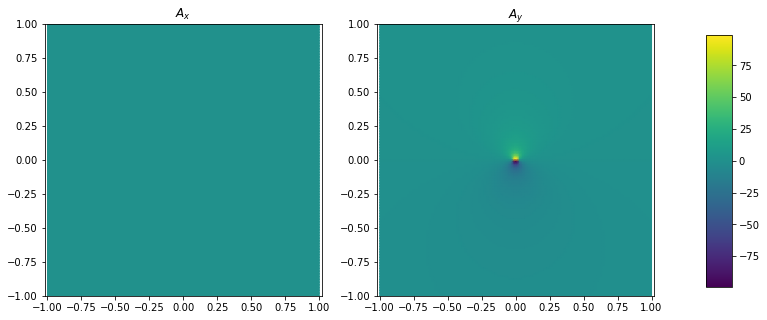

In [13]:
A_s_numerical = sp.lambdify((s, p), A_s_val)
A_p_numerical = sp.lambdify((s, p), A_p_val)
fig, ax = plottings.polar_singularity_vector(vfunc_s=A_s_numerical, vfunc_p=A_p_numerical)
plt.show()

### Example: a singular vector field showing necessity of the conditions

We look at a field whose Fourier coefficients have the correct prefactor in $s$, but have the wrong configuration of coefficients

In [14]:
A_s_val = sp.cos(p)
A_p_val = sp.sin(p)
A_s_exp = A_s_val.rewrite(sp.exp).expand()
A_p_exp = A_p_val.rewrite(sp.exp).expand()
display(sp.Eq(A_s, A_s_val))
display(sp.Eq(A_p, A_p_val))
display(sp.Eq(A_s, A_s_exp))
display(sp.Eq(A_p, A_p_exp))

Eq(A_s, cos(\phi))

Eq(A_{\phi}, sin(\phi))

Eq(A_s, exp(I*\phi)/2 + exp(-I*\phi)/2)

Eq(A_{\phi}, -I*exp(I*\phi)/2 + I*exp(-I*\phi)/2)

As we convert it to Cartesian coordinates, it takes the following form in Cartesian coordinates

In [15]:
A_x_val, A_y_val = rotate_polar2cart_vec(A_s_exp, A_p_exp)
display(sp.Eq(A_x, A_x_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_y, A_y_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))

Eq(A_x, (x**2 - y**2)/(x**2 + y**2))

Eq(A_y, 2*x*y/(x**2 + y**2))

The field is singular and discontinous at the origin:

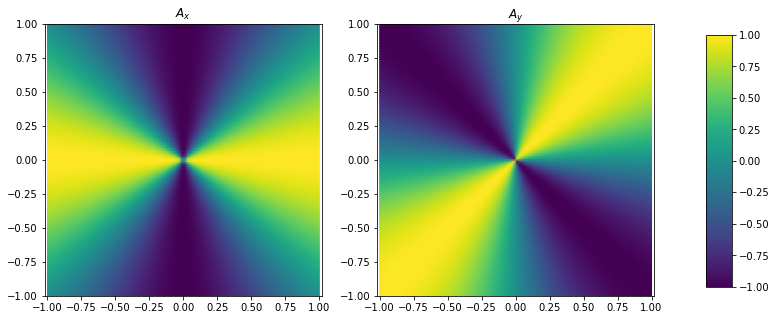

In [16]:
A_s_numerical = sp.lambdify((s, p), A_s_val)
A_p_numerical = sp.lambdify((s, p), A_p_val)
fig, ax = plottings.polar_singularity_vector(vfunc_s=A_s_numerical, vfunc_p=A_p_numerical)
plt.show()

### Example: confirmation of the conditions

Now we simply change the sign of $A_\phi$ so that the Fourier coefficients are indeed $i\mathrm{sgn}(m)$ of the $A_s$ coefficients at the lowest order

In [17]:
A_s_val = sp.cos(p)
A_p_val = -sp.sin(p)
A_s_exp = A_s_val.rewrite(sp.exp).expand()
A_p_exp = A_p_val.rewrite(sp.exp).expand()
display(sp.Eq(A_s, A_s_val))
display(sp.Eq(A_p, A_p_val))
display(sp.Eq(A_s, A_s_exp))
display(sp.Eq(A_p, A_p_exp))

Eq(A_s, cos(\phi))

Eq(A_{\phi}, -sin(\phi))

Eq(A_s, exp(I*\phi)/2 + exp(-I*\phi)/2)

Eq(A_{\phi}, I*exp(I*\phi)/2 - I*exp(-I*\phi)/2)

The field components are perfectly regular in Cartesian coordinates

In [18]:
A_x_val, A_y_val = rotate_polar2cart_vec(A_s_exp, A_p_exp)
display(sp.Eq(A_x, A_x_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_y, A_y_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))

Eq(A_x, 1)

Eq(A_y, 0)

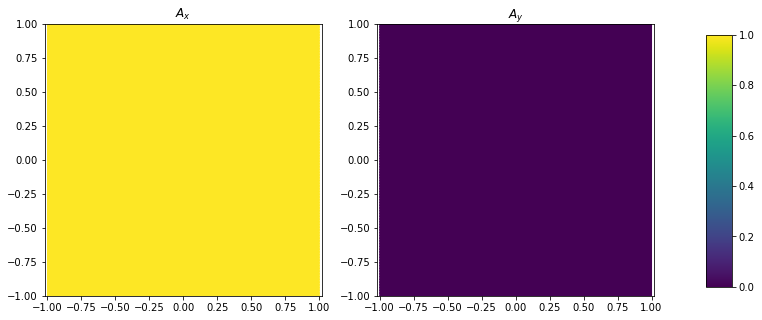

In [19]:
A_s_numerical = sp.lambdify((s, p), A_s_val)
A_p_numerical = sp.lambdify((s, p), A_p_val)
fig, ax = plottings.polar_singularity_vector(vfunc_s=A_s_numerical, vfunc_p=A_p_numerical)
plt.show()

## Rank-2 tensor

Holdenried-Chernoff ([2021](https://www.research-collection.ethz.ch/handle/20.500.11850/509840)) derives the following,
$$
A_{ij} = \left[A_{ij}^{00} + O(s^2)\right] + \sum_{|m|=1} \left[A_{ij}^{m0} s + O(s^3)\right] e^{im\phi} + \sum_{|m|\geq 2} \left[A_{ij}^{m0} s^{|m|-2} + A_{ij}^{m1} s^{|m|} + O(s^{|m|+2})\right] e^{im\phi}
$$
where the following relations apply
$$
m = 0: 
\left\{\begin{aligned}
    &A_{ss}^{00} = A_{\phi\phi}^{00} \\ 
    &A_{s\phi}^{00} = -A_{\phi s}^{00}
\end{aligned}\right.,\qquad 
|m| \geq 2:
\left\{\begin{aligned}
&A_{ss}^{m0} = - A_{\phi\phi}^{m0}\\
&A_{s\phi}^{m0} = A_{\phi s}^{m0} \\ 
&A_{s\phi}^{m0} = i \mathrm{sgn}(m) A_{ss}^{m0}
\end{aligned}\right.
$$

I show that these relations are not exhaustive, and two other conditions are required to make the conditions sufficient. The complete relations are
$$
m = 0: 
\left\{\begin{aligned}
    &A_{ss}^{00} = A_{\phi\phi}^{00} \\ 
    &A_{s\phi}^{00} = -A_{\phi s}^{00}
\end{aligned}\right.,\qquad 
|m| = 1: 
A_{s\phi}^{m0} + A_{\phi s}^{m0} = i\mathrm{sgn}(m) \left(A_{ss}^{m0} - A_{\phi\phi}^{m0}\right),\qquad
|m| \geq 2:
\left\{\begin{aligned}
&A_{ss}^{m0} = - A_{\phi\phi}^{m0}\\
&A_{s\phi}^{m0} = A_{\phi s}^{m0} \\ 
&A_{s\phi}^{m0} = i \mathrm{sgn}(m) A_{ss}^{m0} \\ 
&A_{s\phi}^{m1} + A_{\phi s}^{m1} = i\mathrm{sgn}(m)\left(A_{ss}^{m1} - A_{\phi\phi}^{m1}\right)
\end{aligned}\right.
$$

In [20]:
def rotate_polar2cart_tensor2(F_ss, F_sp, F_ps, F_pp):
    F_xx = sp.cos(p)**2*F_ss + sp.sin(p)**2*F_pp - sp.sin(p)*sp.cos(p)*(F_sp + F_ps)
    F_yy = sp.sin(p)**2*F_ss + sp.cos(p)**2*F_pp + sp.sin(p)*sp.cos(p)*(F_sp + F_ps)
    F_xy = sp.sin(p)*sp.cos(p)*(F_ss - F_pp) + sp.cos(p)**2*F_sp - sp.sin(p)**2*F_ps
    F_yx = sp.sin(p)*sp.cos(p)*(F_ss - F_pp) + sp.cos(p)**2*F_ps - sp.sin(p)**2*F_sp
    return F_xx, F_xy, F_yx, F_yy

### Example: a singular field showing necessity of the |m|=1 condition

The old conditions involve no additional requirements at $|m|=1$. To test if the new condition is really necessary, let us look at a field

In [21]:
A_ss_val = s*sp.cos(p)
A_pp_val = sp.S.Zero
A_sp_val = A_ps_val = s*sp.cos(p)/2
display(sp.Eq(A_ss, A_ss_val))
display(sp.Eq(A_sp, A_sp_val))
display(sp.Eq(A_ps, A_ps_val))
display(sp.Eq(A_pp, A_pp_val))

A_ss_exp = A_ss_val.rewrite(sp.exp).expand()
A_sp_exp = A_sp_val.rewrite(sp.exp).expand()
A_ps_exp = A_ps_val.rewrite(sp.exp).expand()
A_pp_exp = A_pp_val.rewrite(sp.exp).expand()
display(sp.Eq(A_ss, A_ss_exp))
display(sp.Eq(A_sp, A_sp_exp))
display(sp.Eq(A_ps, A_ps_exp))
display(sp.Eq(A_pp, A_pp_exp))

Eq(A_{ss}, s*cos(\phi))

Eq(A_{s\phi}, s*cos(\phi)/2)

Eq(A_{\phi s}, s*cos(\phi)/2)

Eq(A_{\phi\phi}, 0)

Eq(A_{ss}, s*exp(I*\phi)/2 + s*exp(-I*\phi)/2)

Eq(A_{s\phi}, s*exp(I*\phi)/4 + s*exp(-I*\phi)/4)

Eq(A_{\phi s}, s*exp(I*\phi)/4 + s*exp(-I*\phi)/4)

Eq(A_{\phi\phi}, 0)

This field does have all the correct prefactors $s^1$ at $|m|=1$, but $A_{s\phi}^{m0} + A_{\phi s}^{m0} \neq i \mathrm{sgn}(m) (A_{ss}^{m0} - A_{\phi\phi}^{m0})$. As we convert it to Cartesian coordinates, it takes the following form in Cartesian coordinates

In [22]:
A_xx_val, A_xy_val, A_yx_val, A_yy_val = rotate_polar2cart_tensor2(A_ss_exp, A_sp_exp, A_ps_exp, A_pp_exp)
display(sp.Eq(A_xx, A_xx_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_xy, A_xy_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_yx, A_yx_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_yy, A_yy_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))

Eq(A_{xx}, x**2*(x - y)/(x**2 + y**2))

Eq(A_{xy}, x*(x**2 + 2*x*y - y**2)/(2*(x**2 + y**2)))

Eq(A_{yx}, x*(x**2 + 2*x*y - y**2)/(2*(x**2 + y**2)))

Eq(A_{yy}, x*y*(x + y)/(x**2 + y**2))

Different from previous examples, this field is not only bounded, but also at least continuous. However, its derivative is undefined at the origin.

The whole function is not continuously differentiable, so it is still singular.

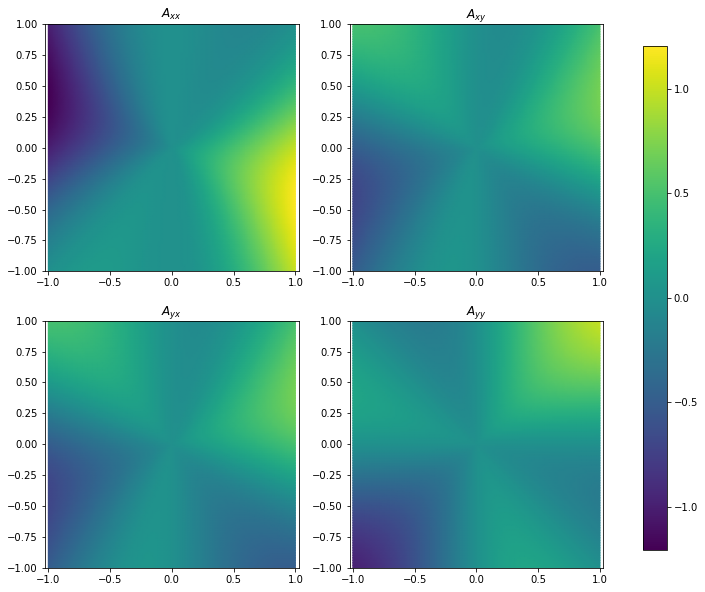

In [23]:
A_ss_numerical = sp.lambdify((s, p), A_ss_val)
A_sp_numerical = sp.lambdify((s, p), A_sp_val)
A_ps_numerical = sp.lambdify((s, p), A_ps_val)
A_pp_numerical = sp.lambdify((s, p), A_pp_val)
fig, ax = plottings.polar_singularity_rank2tensor(
    tfunc_ss=A_ss_numerical, tfunc_sp=A_sp_numerical,
    tfunc_ps=A_ps_numerical, tfunc_pp=A_pp_numerical
)
plt.show()

### Example: confirmation of the |m|=1 condition

Now we change slightly the $A_{ss}$ component from $\cos$ to $\sin$:

In [24]:
A_ss_val = s*sp.sin(p)
A_pp_val = sp.S.Zero
A_sp_val = A_ps_val = s*sp.cos(p)/2
display(sp.Eq(A_ss, A_ss_val))
display(sp.Eq(A_sp, A_sp_val))
display(sp.Eq(A_ps, A_ps_val))
display(sp.Eq(A_pp, A_pp_val))

A_ss_exp = A_ss_val.rewrite(sp.exp).expand()
A_sp_exp = A_sp_val.rewrite(sp.exp).expand()
A_ps_exp = A_ps_val.rewrite(sp.exp).expand()
A_pp_exp = A_pp_val.rewrite(sp.exp).expand()
display(sp.Eq(A_ss, A_ss_exp))
display(sp.Eq(A_sp, A_sp_exp))
display(sp.Eq(A_ps, A_ps_exp))
display(sp.Eq(A_pp, A_pp_exp))

Eq(A_{ss}, s*sin(\phi))

Eq(A_{s\phi}, s*cos(\phi)/2)

Eq(A_{\phi s}, s*cos(\phi)/2)

Eq(A_{\phi\phi}, 0)

Eq(A_{ss}, -I*s*exp(I*\phi)/2 + I*s*exp(-I*\phi)/2)

Eq(A_{s\phi}, s*exp(I*\phi)/4 + s*exp(-I*\phi)/4)

Eq(A_{\phi s}, s*exp(I*\phi)/4 + s*exp(-I*\phi)/4)

Eq(A_{\phi\phi}, 0)

Now this field satisfies $A_{s\phi}^{m0} + A_{\phi s}^{m0} \neq i \mathrm{sgn}(m) (A_{ss}^{m0} - A_{\phi\phi}^{m0})$. As we convert it to Cartesian coordinates, it takes the form

In [25]:
A_xx_val, A_xy_val, A_yx_val, A_yy_val = rotate_polar2cart_tensor2(A_ss_exp, A_sp_exp, A_ps_exp, A_pp_exp)
display(sp.Eq(A_xx, A_xx_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_xy, A_xy_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_yx, A_yx_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_yy, A_yy_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))

Eq(A_{xx}, 0)

Eq(A_{xy}, x/2)

Eq(A_{yx}, x/2)

Eq(A_{yy}, y)

And the whole field becomes perfect regular.

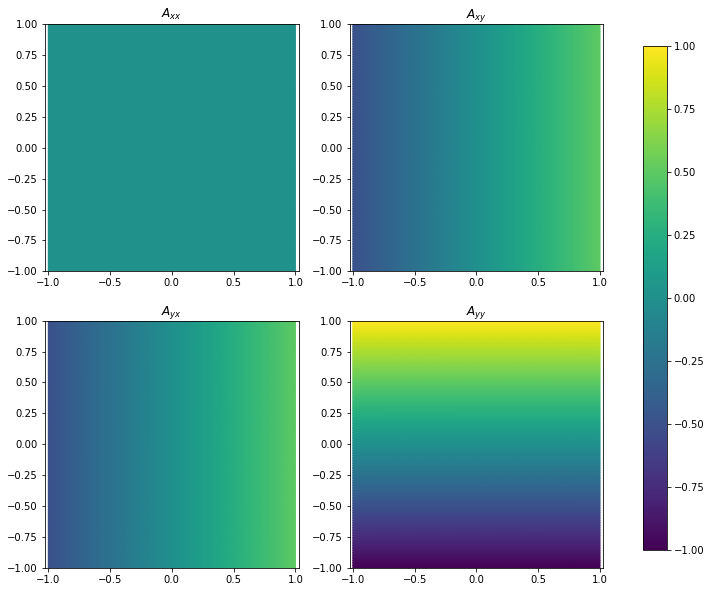

In [26]:
A_ss_numerical = sp.lambdify((s, p), A_ss_val)
A_sp_numerical = sp.lambdify((s, p), A_sp_val)
A_ps_numerical = sp.lambdify((s, p), A_ps_val)
A_pp_numerical = sp.lambdify((s, p), A_pp_val)
fig, ax = plottings.polar_singularity_rank2tensor(
    tfunc_ss=A_ss_numerical, tfunc_sp=A_sp_numerical,
    tfunc_ps=A_ps_numerical, tfunc_pp=A_pp_numerical
)
plt.show()

### Example: a singular field showing necessity of the 2nd-order condition for |m|>1

The old conditions involve no additional requirements at the second order for $|m|\geq 2$. To test if the new condition is really necessary, let us look at a field

In [27]:
A_ss_val = (+1 + s**2)*sp.sin(2*p)
A_pp_val = (-1 + s**2)*sp.sin(2*p)
A_sp_val = A_ps_val = (1 + s**2)*sp.cos(2*p)
display(sp.Eq(A_ss, A_ss_val))
display(sp.Eq(A_sp, A_sp_val))
display(sp.Eq(A_ps, A_ps_val))
display(sp.Eq(A_pp, A_pp_val))

A_ss_exp = A_ss_val.rewrite(sp.exp).expand()
A_sp_exp = A_sp_val.rewrite(sp.exp).expand()
A_ps_exp = A_ps_val.rewrite(sp.exp).expand()
A_pp_exp = A_pp_val.rewrite(sp.exp).expand()
display(sp.Eq(A_ss, A_ss_exp))
display(sp.Eq(A_sp, A_sp_exp))
display(sp.Eq(A_ps, A_ps_exp))
display(sp.Eq(A_pp, A_pp_exp))

Eq(A_{ss}, (s**2 + 1)*sin(2*\phi))

Eq(A_{s\phi}, (s**2 + 1)*cos(2*\phi))

Eq(A_{\phi s}, (s**2 + 1)*cos(2*\phi))

Eq(A_{\phi\phi}, (s**2 - 1)*sin(2*\phi))

Eq(A_{ss}, -I*s**2*exp(2*I*\phi)/2 + I*s**2*exp(-2*I*\phi)/2 - I*exp(2*I*\phi)/2 + I*exp(-2*I*\phi)/2)

Eq(A_{s\phi}, s**2*exp(2*I*\phi)/2 + s**2*exp(-2*I*\phi)/2 + exp(2*I*\phi)/2 + exp(-2*I*\phi)/2)

Eq(A_{\phi s}, s**2*exp(2*I*\phi)/2 + s**2*exp(-2*I*\phi)/2 + exp(2*I*\phi)/2 + exp(-2*I*\phi)/2)

Eq(A_{\phi\phi}, -I*s**2*exp(2*I*\phi)/2 + I*s**2*exp(-2*I*\phi)/2 + I*exp(2*I*\phi)/2 - I*exp(-2*I*\phi)/2)

This field have all the correct prefactors at $|m|=2$, and the lowest order coefficient in $s$ satisfy the conditions required by Holdenried-Chernoff (2021), but the second-order relation is not satisfied, i.e. $A_{s\phi}^{m1} + A_{\phi s}^{m1} \neq i \mathrm{sgn}(m) (A_{ss}^{m1} - A_{\phi\phi}^{m1})$. As we convert it to Cartesian coordinates, it takes the form

In [28]:
A_xx_val, A_xy_val, A_yx_val, A_yy_val = rotate_polar2cart_tensor2(A_ss_exp, A_sp_exp, A_ps_exp, A_pp_exp)
display(sp.Eq(A_xx, A_xx_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_xy, A_xy_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_yx, A_yx_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_yy, A_yy_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))

Eq(A_{xx}, 4*x*y**3/(x**2 + y**2))

Eq(A_{xy}, (x**4 - 2*x**2*y**2 + x**2 + y**4 + y**2)/(x**2 + y**2))

Eq(A_{yx}, (x**4 - 2*x**2*y**2 + x**2 + y**4 + y**2)/(x**2 + y**2))

Eq(A_{yy}, 4*x**3*y/(x**2 + y**2))

The field is again bounded and continuous, but is not continuously differentiable, and hence still singular.

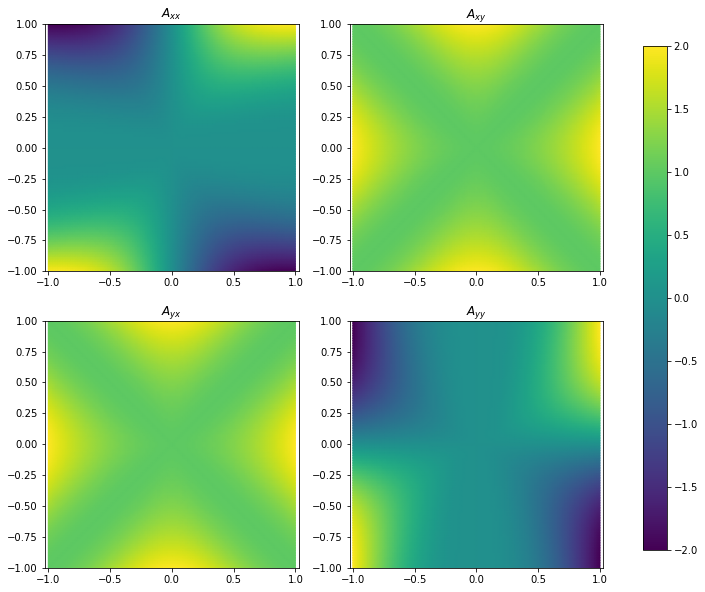

In [29]:
A_ss_numerical = sp.lambdify((s, p), A_ss_val)
A_sp_numerical = sp.lambdify((s, p), A_sp_val)
A_ps_numerical = sp.lambdify((s, p), A_ps_val)
A_pp_numerical = sp.lambdify((s, p), A_pp_val)
fig, ax = plottings.polar_singularity_rank2tensor(
    tfunc_ss=A_ss_numerical, tfunc_sp=A_sp_numerical,
    tfunc_ps=A_ps_numerical, tfunc_pp=A_pp_numerical
)
plt.show()

### Example: confirmation of the 2nd-order condition for |m|>1

We only need to flip the sign for the second order term in $A_{\phi\phi}$ to construct a field which completely abides by the newly derived regularity conditions, even at second order:

In [30]:
A_ss_val = (+1 + s**2)*sp.sin(2*p)
A_pp_val = (-1 - s**2)*sp.sin(2*p)
A_sp_val = A_ps_val = (1 + s**2)*sp.cos(2*p)
display(sp.Eq(A_ss, A_ss_val))
display(sp.Eq(A_sp, A_sp_val))
display(sp.Eq(A_ps, A_ps_val))
display(sp.Eq(A_pp, A_pp_val))

A_ss_exp = A_ss_val.rewrite(sp.exp).expand()
A_sp_exp = A_sp_val.rewrite(sp.exp).expand()
A_ps_exp = A_ps_val.rewrite(sp.exp).expand()
A_pp_exp = A_pp_val.rewrite(sp.exp).expand()
display(sp.Eq(A_ss, A_ss_exp))
display(sp.Eq(A_sp, A_sp_exp))
display(sp.Eq(A_ps, A_ps_exp))
display(sp.Eq(A_pp, A_pp_exp))

Eq(A_{ss}, (s**2 + 1)*sin(2*\phi))

Eq(A_{s\phi}, (s**2 + 1)*cos(2*\phi))

Eq(A_{\phi s}, (s**2 + 1)*cos(2*\phi))

Eq(A_{\phi\phi}, (-s**2 - 1)*sin(2*\phi))

Eq(A_{ss}, -I*s**2*exp(2*I*\phi)/2 + I*s**2*exp(-2*I*\phi)/2 - I*exp(2*I*\phi)/2 + I*exp(-2*I*\phi)/2)

Eq(A_{s\phi}, s**2*exp(2*I*\phi)/2 + s**2*exp(-2*I*\phi)/2 + exp(2*I*\phi)/2 + exp(-2*I*\phi)/2)

Eq(A_{\phi s}, s**2*exp(2*I*\phi)/2 + s**2*exp(-2*I*\phi)/2 + exp(2*I*\phi)/2 + exp(-2*I*\phi)/2)

Eq(A_{\phi\phi}, I*s**2*exp(2*I*\phi)/2 - I*s**2*exp(-2*I*\phi)/2 + I*exp(2*I*\phi)/2 - I*exp(-2*I*\phi)/2)

As we convert it to Cartesian coordinates, it takes the form

In [31]:
A_xx_val, A_xy_val, A_yx_val, A_yy_val = rotate_polar2cart_tensor2(A_ss_exp, A_sp_exp, A_ps_exp, A_pp_exp)
display(sp.Eq(A_xx, A_xx_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_xy, A_xy_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_yx, A_yx_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))
display(sp.Eq(A_yy, A_yy_val.rewrite(sp.exp).expand().subs(polar2cart_map).simplify()))

Eq(A_{xx}, 0)

Eq(A_{xy}, x**2 + y**2 + 1)

Eq(A_{yx}, x**2 + y**2 + 1)

Eq(A_{yy}, 0)

The field is now polynomial and undoubtedly regular throughout the domain

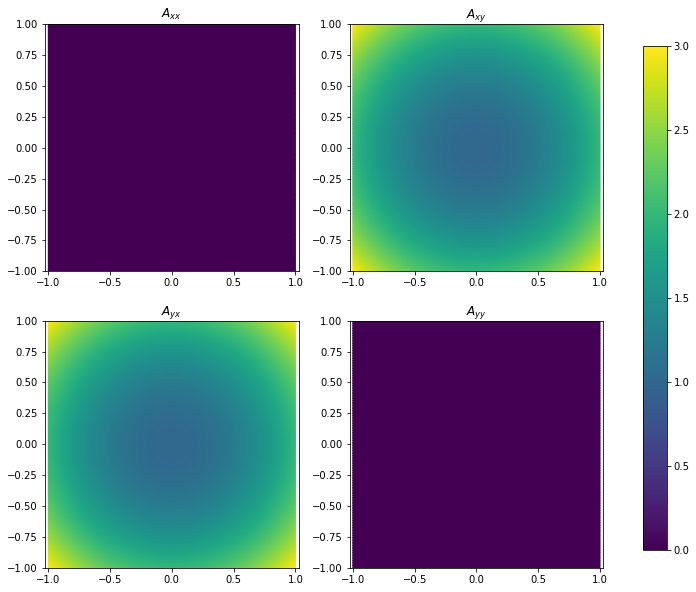

In [32]:
A_ss_numerical = sp.lambdify((s, p), A_ss_val)
A_sp_numerical = sp.lambdify((s, p), A_sp_val)
A_ps_numerical = sp.lambdify((s, p), A_ps_val)
A_pp_numerical = sp.lambdify((s, p), A_pp_val)
fig, ax = plottings.polar_singularity_rank2tensor(
    tfunc_ss=A_ss_numerical, tfunc_sp=A_sp_numerical,
    tfunc_ps=A_ps_numerical, tfunc_pp=A_pp_numerical
)
plt.show()